# Import Library dan DataSet

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("/content/DATARUMAH.csv")

# Data Pre-Processing

In [ ]:
print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())

Shape dataset: (1011, 6)

Lima data teratas:
           HARGA     LB     LT   KT   KM  GRS
0  3.800000e+09  220.0  220.0  3.0  3.0  0.0
1  4.600000e+09  180.0  137.0  4.0  3.0  2.0
2  3.000000e+09  267.0  250.0  4.0  4.0  4.0
3  4.300000e+08   40.0   25.0  2.0  2.0  0.0
4  9.000000e+09  400.0  355.0  6.0  5.0  3.0

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HARGA   1010 non-null   float64
 1   LB      1010 non-null   float64
 2   LT      1010 non-null   float64
 3   KT      1010 non-null   float64
 4   KM      1010 non-null   float64
 5   GRS     1010 non-null   float64
dtypes: float64(6)
memory usage: 47.5 KB
None

Statistik deskriptif:
               HARGA           LB           LT           KT           KM  \
count  1.010000e+03  1010.000000  1010.000000  1010.000000  1010.000000   
mean   7.628987e+09   276.539604   237.432

In [ ]:
print('\nLima data teratas:\n', dataset.head())


Lima data teratas:
           HARGA     LB     LT   KT   KM  GRS
0  3.800000e+09  220.0  220.0  3.0  3.0  0.0
1  4.600000e+09  180.0  137.0  4.0  3.0  2.0
2  3.000000e+09  267.0  250.0  4.0  4.0  4.0
3  4.300000e+08   40.0   25.0  2.0  2.0  0.0
4  9.000000e+09  400.0  355.0  6.0  5.0  3.0


In [ ]:
#Melihat Korelasi Antar Kolom
dataset_corr = dataset.corr()
print('Korelasi dataset:\n', dataset.corr())

Korelasi dataset:
           HARGA        LB        LT        KT        KM       GRS
HARGA  1.000000  0.747083  0.809617  0.323320  0.404770  0.484892
LB     0.747083  1.000000  0.740341  0.443578  0.529889  0.492331
LT     0.809617  0.740341  1.000000  0.425484  0.388504  0.484394
KT     0.323320  0.443578  0.425484  1.000000  0.669457  0.280445
KM     0.404770  0.529889  0.388504  0.669457  1.000000  0.345323
GRS    0.484892  0.492331  0.484394  0.280445  0.345323  1.000000


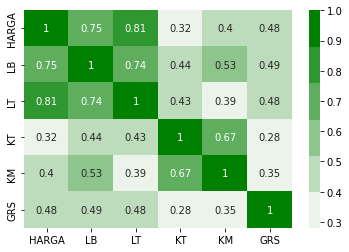

In [ ]:
color = sns.light_palette("green")
sns.heatmap(dataset_corr, annot=True, cmap=color)

In [ ]:
#checking missing value antar kolom  
print(dataset.isnull().sum())
#Menghitung total missing value
print(dataset.isnull().sum().sum())

HARGA    1
LB       1
LT       1
KT       1
KM       1
GRS      1
dtype: int64
6


In [ ]:
print(dataset.dropna())

             HARGA     LB     LT    KT    KM  GRS
0     3.800000e+09  220.0  220.0   3.0   3.0  0.0
1     4.600000e+09  180.0  137.0   4.0   3.0  2.0
2     3.000000e+09  267.0  250.0   4.0   4.0  4.0
3     4.300000e+08   40.0   25.0   2.0   2.0  0.0
4     9.000000e+09  400.0  355.0   6.0   5.0  3.0
...            ...    ...    ...   ...   ...  ...
1005  9.000000e+09  450.0  550.0  10.0  10.0  3.0
1006  4.000000e+09  160.0  140.0   4.0   3.0  2.0
1007  4.000000e+09  139.0  230.0   4.0   4.0  1.0
1008  1.900000e+10  360.0  606.0   7.0   4.0  0.0
1009  1.050000e+10  420.0  430.0   7.0   4.0  2.0

[1010 rows x 6 columns]


In [ ]:
# Q1, Q3, dan IQR
Q1 = dataset['HARGA'].quantile(0.25)
Q3 = dataset['HARGA'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', dataset.shape)

# Menghapus outliers
dataset = dataset[~((dataset['HARGA'] < (Q1 - 1.5 * IQR)) | (dataset['HARGA'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', dataset.shape)


Shape awal:  (1011, 6)
Shape akhir:  (917, 6)


In [ ]:
from google.colab import files


In [ ]:
dataset.to_csv('dataset_clean.csv')